In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error


#Read data

In [2]:
data = pd.read_csv('./data/dataset_cal.csv')

In [3]:
data.shape

(64697, 43)

#Split data

In [4]:
X = data.iloc[:, 1:34]
y = data.iloc[:, 0]



In [5]:
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(38818, 33) (38818,) (25879, 33) (25879,)


#Model fitting

In [6]:
forest = RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=1000,n_jobs=-1)

In [8]:
forest.fit(X_train, y_train)
y_test_pred = forest.predict(X_val)

#Model evaluation

In [ ]:
mean_absolute_error(y_val,y_test_pred)

6.100262064607306

In [9]:
S1 = data.loc[data['Subject'] == 'S1']
S1_X = S1.iloc[:, 1:34]
S1_y = S1.iloc[:, 0]


In [10]:
S1_pred = forest.predict(S1_X)
print('S1 MAE = ' + str(mean_absolute_error(S1_y, S1_pred)))


S1 MAE = 5.350993797911458


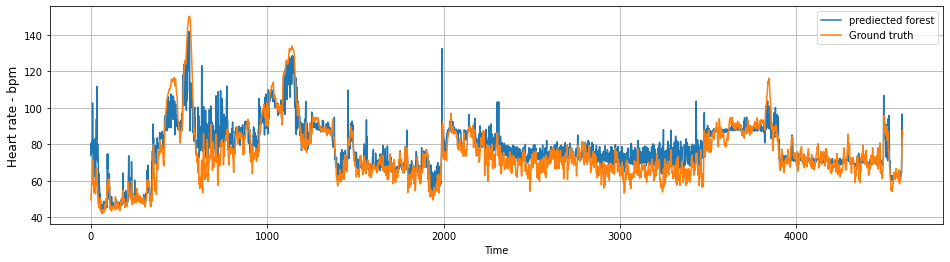

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( forest.predict(S1_X), label = 'prediected forest')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()